### Connectivity-based clustering (Hierarchical Clustering):
- Connectivity-based(or hierarchical) clustering builds nested groupings of data by evaluating how data points are connected to eachother.
- It creates a dendrogram a tree like structure that reflects relationships at various graularity levels and does not require to specifing the number of clusters.
- But can be computationally intensive.
- It uses approaches like -
  1. Agglomerative [ Bottom-up ]
  2. Dic=visive [ Top- down ]

### Agglomerative Clustering Algorithm:
- Agglomerative Clustering is one of the most common hierarchical clustering technique where each data point starts in its own group(cluster) and step-by-step the closest clusters are joined together until we reach one big cluster.
- It's a bottom-up approach meaning -
  1. Each data point is in its own cluster.
  2. pairs of clusters are merged step-by-step based on a linkage criterion like shortest distance until all points are merged into a songle cluster or until a desired number of clusters is formed.
- It's used for marketing, biology, education, and fraud detection to find natural patterns in data.

### Implementation of Agglomerative Clustering:
#### 1. Importing required Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

#### 2. Loading and Cleaning the data:
- We will now read the .csv file and clean it.
  1. Remove the CUST_ID column since it's just an ID and not useful.
  2. Handling missing values using forward fill.

In [16]:
data = pd.read_csv('CC_GENERAL.csv')
data.drop('CUST_ID', axis=1, inplace=True)
data.fillna(method='ffill', inplace=True)
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'CC_GENERAL.csv'

### 3. Preprocessing the data:
- We prepare the data so that all features are on the same scale.
  1. Scaling - makes features comparable it is important because clustering depends on distance.
  2. Normalization - helps the clustering algorithm work better.

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

NameError: name 'X' is not defined

#### 4. Reducing the dmensionality of the Data:
- We use PCA to reduce many columns features to just 2 so we can easily visualize the data.

In [13]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

NameError: name 'X_normalized' is not defined

#### 5. Make the dendograms:
- A dendogram helps us decide how many clusters to choose. We will use the matplotlib to plot it.

NameError: name 'X_prinicipal' is not defined

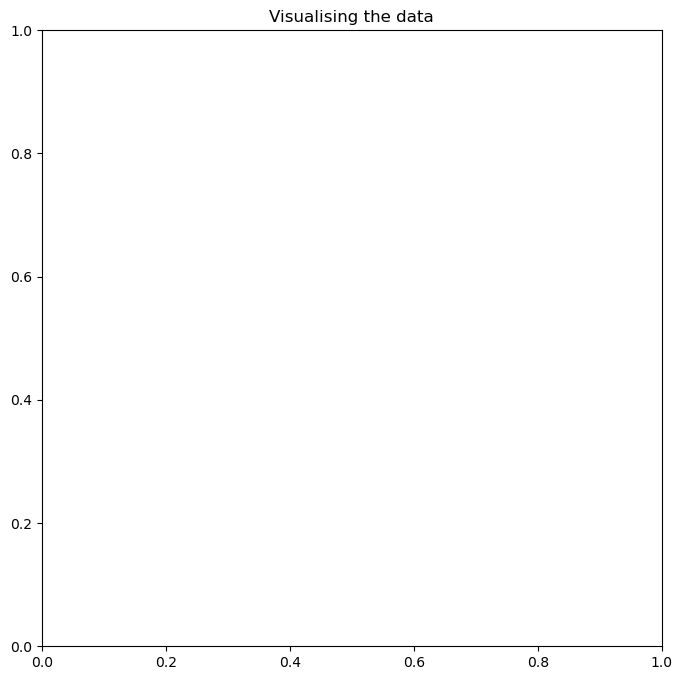

In [14]:
plt.figure(figsize=(8,8))
plt.title('Visualising the data')
Dendogram = shc.dendrogram((shc.linkage(X_prinicipal, method='ward')))

#### 6. Apply aggolomerative clustering for Different Values of k:
- Now let's apply clustering for different values of k(no of clusters).
- For each value of k we created a clustering model and plot the two PCA components colored by cluster.

In [ ]:
for k in range(2, 7):  # Try values from 2 to 6
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_pca['P1'], X_pca['P2'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering (k={k})')
    plt.xlabel('P1')
    plt.ylabel('P2')
    plt.show()

#### 7. Evaluate models and visualizing results:
- silhouette score tells us how well the data has been grouped.
- The Higher the score the better is model.

In [15]:
k = [2,3,4,5,6]

silhouette_scores = []
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal)))

plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('S(i)', fontsize=20)
plt.show()

NameError: name 'X_principal' is not defined